A simple neural network written in Keras (TensorFlow backend) to classify the IRIS data


In [1]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense
#from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

In [2]:
iris_data = load_iris() # load the iris dataset

print('Example data: ')
print(iris_data.data[:5])
print('Example labels: ')
print(iris_data.target[:5])#30:

Example data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Example labels: 
[0 0 0 0 0]


In [3]:
x = iris_data.data
y_ = iris_data.target.reshape(-1, 1) # Convert data to a single column

In [4]:
print(x.shape)
print(y_.shape)

(150, 4)
(150, 1)


In [5]:
# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)#True
y = encoder.fit_transform(y_)
print(y.shape,type(y))
print(y)#.T

(150, 3) <class 'numpy.ndarray'>
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1.

In [6]:
# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)
train_x.shape

(120, 4)

In [7]:
# Build the model
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax', name='o/p_layer'))

# Adam optimizer with learning rate of 0.001
#optimizer = Adam(lr=0.001)
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())

Neural Network Model Summary: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 o/p_layer (Dense)           (None, 3)                 15        
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
# Train the model
early_stopping_monitor = EarlyStopping(min_delta = 0.1, patience = 10, monitor= "val_accuracy")  #How Many Epochs that model go without improving before we stop training
results = model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=500,validation_data=(test_x,test_y), callbacks= [early_stopping_monitor])#5

Epoch 1/500
24/24 - 2s - loss: 4.7757 - accuracy: 0.3500 - val_loss: 5.8016 - val_accuracy: 0.2667 - 2s/epoch - 81ms/step
Epoch 2/500
24/24 - 0s - loss: 4.4702 - accuracy: 0.3667 - val_loss: 5.4475 - val_accuracy: 0.3000 - 181ms/epoch - 8ms/step
Epoch 3/500
24/24 - 0s - loss: 4.2033 - accuracy: 0.5250 - val_loss: 5.1280 - val_accuracy: 0.4667 - 131ms/epoch - 5ms/step
Epoch 4/500
24/24 - 0s - loss: 3.9635 - accuracy: 0.6667 - val_loss: 4.8299 - val_accuracy: 0.5667 - 116ms/epoch - 5ms/step
Epoch 5/500
24/24 - 0s - loss: 3.7361 - accuracy: 0.6833 - val_loss: 4.5567 - val_accuracy: 0.5667 - 164ms/epoch - 7ms/step
Epoch 6/500
24/24 - 0s - loss: 3.5266 - accuracy: 0.6833 - val_loss: 4.2799 - val_accuracy: 0.5667 - 117ms/epoch - 5ms/step
Epoch 7/500
24/24 - 0s - loss: 3.3082 - accuracy: 0.6833 - val_loss: 4.0308 - val_accuracy: 0.5667 - 142ms/epoch - 6ms/step
Epoch 8/500
24/24 - 0s - loss: 3.1078 - accuracy: 0.6833 - val_loss: 3.7531 - val_accuracy: 0.5667 - 107ms/epoch - 4ms/step
Epoch 9/50

In [9]:
# Test on unseen data

result = model.evaluate(test_x, test_y)

print('Final test set loss:',result[0])
print('Final test set accuracy:',result[1])


1/1 [==============================] - 0s 344ms/step - loss: 1.2735 - accuracy: 0.6000
Final test set loss: 1.2735302448272705
Final test set accuracy: 0.6000000238418579


Text(0, 0.5, 'losses')

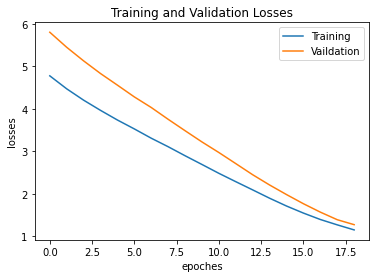

In [10]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoches')
plt.ylabel('losses')

Text(0, 0.5, 'accuracy')

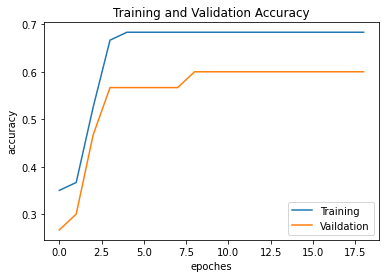

In [11]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoches')
plt.ylabel('accuracy')